In [106]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

### 1. Fetch CSV data.

In [108]:
data = pd.read_csv("IMDB_dataset.csv")
data.shape

(6104, 2)

In [109]:
data.head(5)

,review,sentiment
0,I thought this was a wonderful way to spend ti...,positive
1,"Probably my all-time favorite movie, a story o...",positive
2,I sure would like to see a resurrection of a u...,positive
3,"This show was an amazing, fresh & innovative i...",negative
4,Encouraged by the positive comments about this...,negative


In [110]:
sentiment_initial_data = data['sentiment']
review_initial_data = data['review']

### 2. Label the sentiment text

In [125]:
lb=LabelBinarizer()

sentiment_data=lb.fit_transform(data['sentiment'])
data['sentiment'] = sentiment_data

### 3. Plotting visualizations

### i) Pie chart

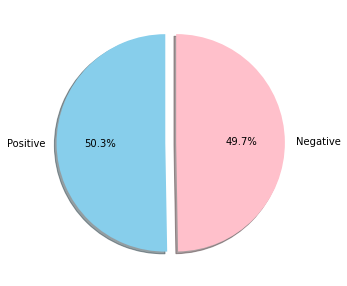

In [123]:
fig = plt.figure(figsize=(5,5))
colors = ['skyblue','pink']
pos = data[data['sentiment']==1]
neg = data[data['sentiment']==0]
ck = [pos['sentiment'].count(),neg['sentiment'].count()]
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 90,
                 explode=(0, 0.1))

### ii) Word Cloud

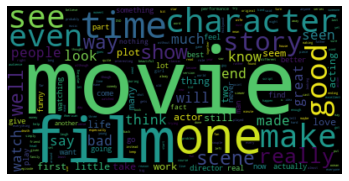

In [124]:
text = ''.join(review_initial_data)
    
CLEANR = re.compile('<.*?>')
cleantext = re.sub(CLEANR, '', text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(cleantext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()